In [1]:
import nltk
import pandas as pd
import matplotlib as plt
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer, WordNetLemmatizer

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv('reddit_data_one-year.csv')


In [3]:
#### make lowercase and remove punctuation

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

data['text'] = data.text.map(alphanumeric).map(punc_lower)

In [4]:
def make_corpus(x):
    a_file = open(x, "r")
    corpus = [s.strip() for s in a_file.readlines()]
    a_file.close()
    return corpus

In [5]:
corpus1 = make_corpus('stop_words_english.txt')
corpus2 = make_corpus("google-10000-english-usa.txt")
big_corpus = corpus1 + corpus2

In [6]:
stemmer = SnowballStemmer('english')


In [7]:
####create initial filter, apply stemming

filtered = []
for i in data.text:
    new_data = i.split()
    post_filter = []
    for i in new_data:
        if i not in corpus1:
            i = stemmer.stem(i)        
            if i not in corpus2:
                post_filter.append(i)
    post_filter = ' '.join(post_filter)
    filtered.append(post_filter)
data['general_words_removed'] = filtered

In [8]:
drug_corpus_clean = ['amphetamine', 'clonazolam', 'dopamine', 'methylphenidate', 'bromazolam', 'triptamine', 'dmt', 'mxe', 'fxe', 'flubromazolam',
 'triazolam', 'flualprazolam', 'arylcyclohexylamine', 'acetone', 'chloride', 'etizolam', 'alprazolam',
 'dinotrogen', 'dpt', 'dck', 'bromazepam', 'lorazepam', 'trazodone', 'mirtazapine', 'ketamine', 'klonopin', 'propranolol',
 'fluclotizolam', 'diclazepam', 'norflurazepam', 'quetiapine', 'xan', 'hydrochloride', 'aplrazolam', 'phenethylamine', 'bretazenil', 'rilmazafone', 'pyrazolam', 'emoxypine', 'fasoracetam', 'mda', 'tyrosine', 'diazepam', 'phenylpiracetam', 'pvp', 'flunitrazolam', 'cyclazodone',
 'thc', 'dexamphetamine', 'benzene', 'piracetam', 'benzodiazepine', 'diazepine', 'tryptamine', 'diclaz',
 'metizolam', 'flubrotizolam', 'mescaline', 'hydroxytryptamine', 'dimethyltryptamine', 'clonazepam', 'clonzolam', 'doxylamine', 'diphenydramine',
 'ket', 'allylescaline', 'phenylethylamine', 'oxy', 'nitrazolam', 'clonozolam', 'dopamine',
 'etazene', 'methylamphetamine', 'phenidate', 'mth', 'dextroamphetamine', 'midazolam', 'methamphetamine',
 'fluoroamphetamine', 'ethyltryptamine', 'ethylamine', 'flouromethamphetamine', 'methoxetamine', 'cyclaz', 'zylofuramine', 'cypenamine', 'ephenidine', 'ketamine', 'flumazenil', 'xtc',
 'monoamine', 'methallylescaline', 'methallyescaline', 'propanolol', 'tapentadol', 'esketamine', 'sine', 'isopropylphenidate', 'ethylphenidate', 'diphenhydramine', 'metodesnitazene',
 'fluonitazene', 'tiletamine', 'flubromzolam', 'isotonitazene', 'proppranolol', 'racetam', 'desoxymethoxetamine', 'imidazenil',
 'isopropyphenidate', 'propylphenidate', 'fluoromethylphenidate', 'lisdexamphetamine', 'isoproscaline',
 'isopropoxyphenethylamine', 'mhp', 'lisdexamfetamine', 'flourodeschloroketamine', 'sulbutiamine', 'trpytamine', 'methiopropamine', 'methalyescaline',
 'flurazepam', 'olanzapine', 'dizocilpine', 'nimetazepam', 'methylenedioxymethamphetamine', 'etonitazene',
 'lormetazepam', 'flunitrazepam', 'dxe', 'temazepam', 'oxazepam', 'ephinidine', 'thiamine', 'tryosine', 'bromozolam', 'isopropylphenidine',
 'chloroephenidine', 'hydroxymetamine', 'pcm', 'methoxyketamine', 'norketamine', 'cyclopropylmescaline', 'dichloromescaline', 'dibromomescaline', 'hodgkinsine',
 'phenazepam', 'brotizolam', 'hearthstone', 'methallallylescaline', 'deoxymethoxetamine', 'zolam', 'methoxpropamine',
 'metilphenidate', 'deschloroketamine','itonitazene']

additional_drug_terms = ['opioid','tramadol','tramadol','dopamin','vyvans','oxycodon','dsmt','gabapentin','memantin','benzo',
                         'opiat','kpin','psilocybin','fdck','mxipr','hexen','redos','arylcyclohexylamin','odsmt','methadon','dipt',
                        'morphin','etazen','eutylon','suboxon','glycol','mxpr','dmxe','shroom','isom','amphetamin','methylphenid','mapb',
                        'kratom','ethyl','coke','adderall','etiz','meth','heroin','mdma','cannabinoid','benzos','phenibut','ethanol','cathinone',
                        'cathinon','gram','ketamin']

misc_terms = ['researchchem','wiki','https','subreddit','psychonautwiki','clam','pyro','adhd','doses','didn',
              'don','stims','reddit','doesn','woudln','don','taper','honestly','solut','experience','effect','experi',
             'minut','peopl','daili','pretti','sleep','question','reddit',]

In [9]:
additional_terms = set(drug_corpus_clean + additional_drug_terms + misc_terms)

In [10]:
drug_corpus = set(drug_corpus_clean + additional_drug_terms)

In [11]:
filtered2 = []
for i in data.general_words_removed:
    new_data = i.split()
    post_filter = []
    for i in new_data:
        if len(i) > 4 and i not in additional_terms:
            post_filter.append(i)
    post_filter = ' '.join(post_filter)
    filtered2.append(post_filter)  
data['drugsremoved'] = filtered2

In [12]:
data.to_csv('for_analysis.csv', index=False)

In [13]:
drugs_in_text = []
for i in data.text:
    new_data = i.split()
    post_filter = []
    for i in new_data:
        if i in drug_corpus:
            drugs_in_text.append(i)

In [14]:
all_drugs_df = pd.DataFrame(drugs_in_text)
all_drugs_df[0] = all_drugs_df[0].str.replace('benzos','benzo')

top_values = pd.DataFrame(all_drugs_df.value_counts().head(5))

In [15]:
all_drugs_df.to_csv('drugs_corpus.csv',index=False)

In [16]:
top_values['drug_name'] = top_values.index


In [17]:
top_values.columns = ['values', 'drug']


In [20]:
top_values

,values,drug
0,,
benzo,380,"(benzo,)"
mdma,182,"(mdma,)"
etizolam,156,"(etizolam,)"
ketamine,156,"(ketamine,)"
dmt,134,"(dmt,)"


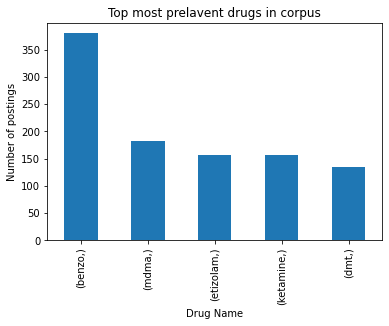

In [19]:
import matplotlib.pyplot as plt

top_values.plot.bar(x=None, y=None)
plt.title('Top most prelavent drugs in corpus')
plt.xlabel('Drug Name')
plt.ylabel('Number of postings')
plt.legend().remove()


In [ ]:
top_values